In [10]:
!pip install joblib


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pomegranate 1.1.1 requires networkx>=2.8.4, which is not installed.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

In [14]:
iris = load_iris()
iris
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
print(iris.data)
print(iris.data.shape)
print(iris.data.dtype)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [17]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [21]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y = iris.target
y
y.shape

(150,)

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [35]:
# Preprocess the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Gradient Boosting Classifier (e.g., XGBoost, LightGBM, or CatBoost)

Description: Gradient Boosting builds an ensemble of decision trees sequentially, where each tree corrects the errors of the 
previous ones. Libraries like XGBoost, LightGBM, or CatBoost are optimized implementations of gradient boosting.

/Users/tejsharm/miniconda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:11:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


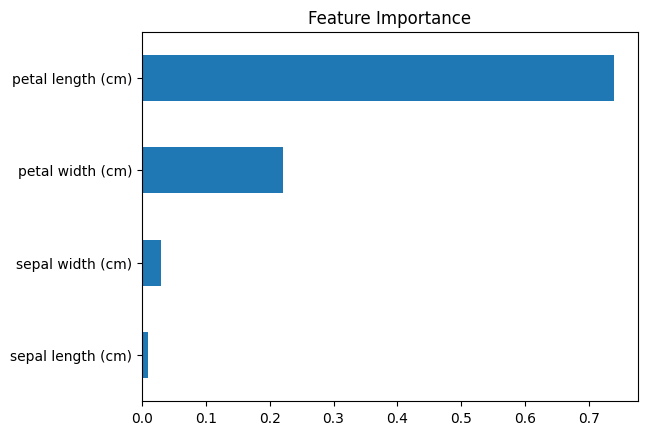

In [36]:
from xgboost import XGBClassifier

# Replace RandomForestClassifier with XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate as before
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=iris.feature_names)
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

### Pros:

High Accuracy: Gradient Boosting often achieves state-of-the-art performance, especially for small datasets like Iris.
                                                                            
Handles Non-Linear Data: Like Random Forest, it can capture complex patterns in the data.
                                                                            
Feature Importance: Provides feature importance scores, similar to Random Forest, which can be visualized.
                                                                            
Robust to Overfitting: With proper regularization (e.g., max_depth, learning_rate), gradient boosting is robust to overfitting.
                                                                            
Optimized Implementations: Libraries like XGBoost and LightGBM are highly optimized for speed and performance.
                                                                                   
### Cons:

Computationally Intensive: Gradient Boosting is slower to train than simpler models like Logistic Regression or Decision Trees,
                           though this is less of an issue for the small Iris dataset.
Complex Hyperparameter Tuning: Requires tuning parameters like learning_rate, n_estimators, and max_depth for optimal performance.

Less Interpretable: While feature importance is available, the ensemble nature makes it harder to interpret individual predictions compared to a single Decision Tree.

Dependency on External Libraries: Requires installing additional packages (e.g., xgboost, lightgbm, or catboost).

### Considerations for Iris Dataset:

The Iris dataset’s small size makes gradient boosting slightly overkill, but it can still achieve high accuracy.

Use cross-validation to tune hyperparameters like learning_rate and n_estimators.

Feature importance plots will be similar to Random Forest but may differ slightly due to the boosting mechanism.

Consider trying LightGBM or CatBoost, which are faster and may handle small datasets efficiently.

In [39]:
from sklearn.neural_network import MLPClassifier

# Replace RandomForestClassifier with MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate as before
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Pros:

Highly Flexible: MLPs can model complex, non-linear relationships, making them suitable for the Iris dataset’s mixed separability.

Scalable to Complex Problems: While overkill for Iris, MLPs are powerful for larger, more complex datasets.

Adaptable Architecture: You can adjust the number and size of hidden layers to control model complexity.

### Cons:

Overkill for Small Datasets: The Iris dataset is small and simple, so an MLP may not outperform simpler models like Random Forest or SVM.

Computationally Intensive: Training neural networks is slower and requires more computational resources than other algorithms.

Sensitive to Feature Scaling: MLPs require standardized features (already handled in script).

Hyperparameter Tuning: Parameters like hidden_layer_sizes, learning_rate, and max_iter require careful tuning.

Limited Interpretability: MLPs do not provide straightforward feature importance scores, unlike Random Forest or Decision Trees.

### Considerations for Iris Dataset:

Start with a simple architecture (e.g., one hidden layer with 100 neurons) to avoid overfitting.

Use cross-validation to tune hyperparameters like hidden_layer_sizes and learning_rate.

Feature importance can be approximated using permutation importance or other methods, as MLPs don’t provide built-in feature importance.

Ensure convergence by setting a high max_iter or using early stopping.

### General Considerations for the Iris Dataset

Dataset Characteristics:
Size: Small (150 samples, 50 per class), so computationally intensive models like Gradient Boosting or Neural Networks may be overkill.

Feature Space: Four features (sepal length, sepal width, petal length, petal width), with petal features having high correlation with the target.

Class Separability: Setosa is linearly separable, while Versicolor and Virginica overlap, requiring models that can handle non-linear boundaries for optimal performance.

Clean Data: No missing values or significant outliers, so preprocessing is minimal (standardization is sufficient).

Preprocessing:
Script already uses StandardScaler, which is essential for Logistic Regression, SVM, KNN, and MLP, but optional for Decision Trees and Gradient Boosting.

Consider adding feature selection (e.g., using petal length and width only) if you want to simplify the model, as these features are most important based on your Random Forest results.

Evaluation:

Use the same metrics (accuracy_score, classification_report, confusion_matrix) for all algorithms to ensure fair comparison.

Cross-validation (e.g., cross_val_score) can provide more robust performance estimates, especially for small datasets like Iris.

The Iris dataset is balanced (33.3% per class), so accuracy is a reasonable metric, but precision, recall, and F1-score (from classification_report) provide deeper insights.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'saga']}
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', max_iter=200), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100, 'solver': 'lbfgs'}


/Users/tejsharm/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/tejsharm/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/tejsharm/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/tejsharm/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'm


Model: Logistic Regression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Model: SVM
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Model: KN

/Users/tejsharm/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


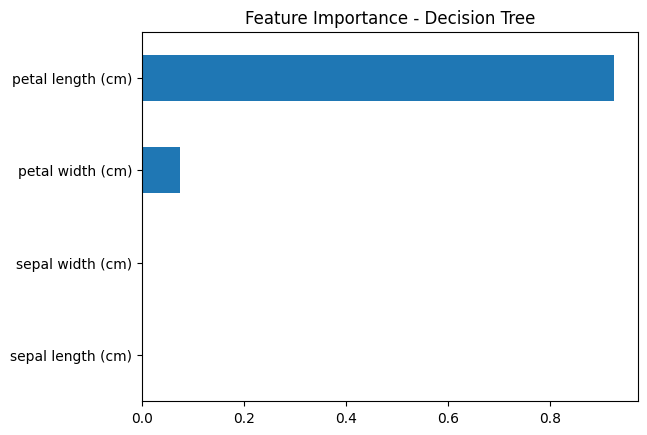


Model: XGBoost
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


/Users/tejsharm/miniconda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:52:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


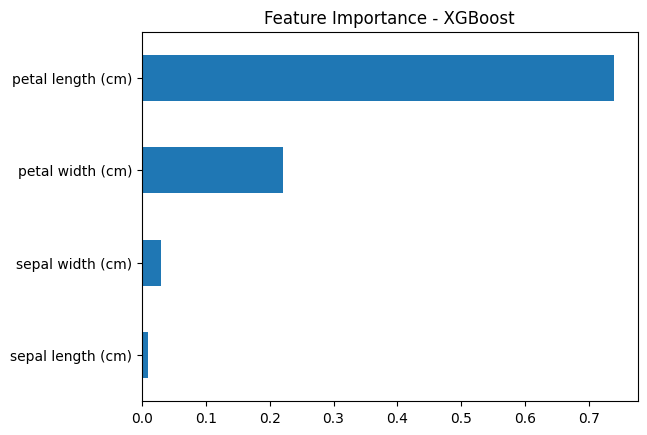


Model: MLP
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Define models
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    'SVM': SVC(kernel='rbf', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Feature importance (if available)
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.Series(model.feature_importances_, index=iris.feature_names)
        feature_importance.sort_values().plot(kind='barh')
        plt.title(f'Feature Importance - {name}')
        plt.show()